In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("/content/Zoo.csv")

In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# **2. Exploratory Data Analysis (Visualizations)**

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


# **Pairplot**

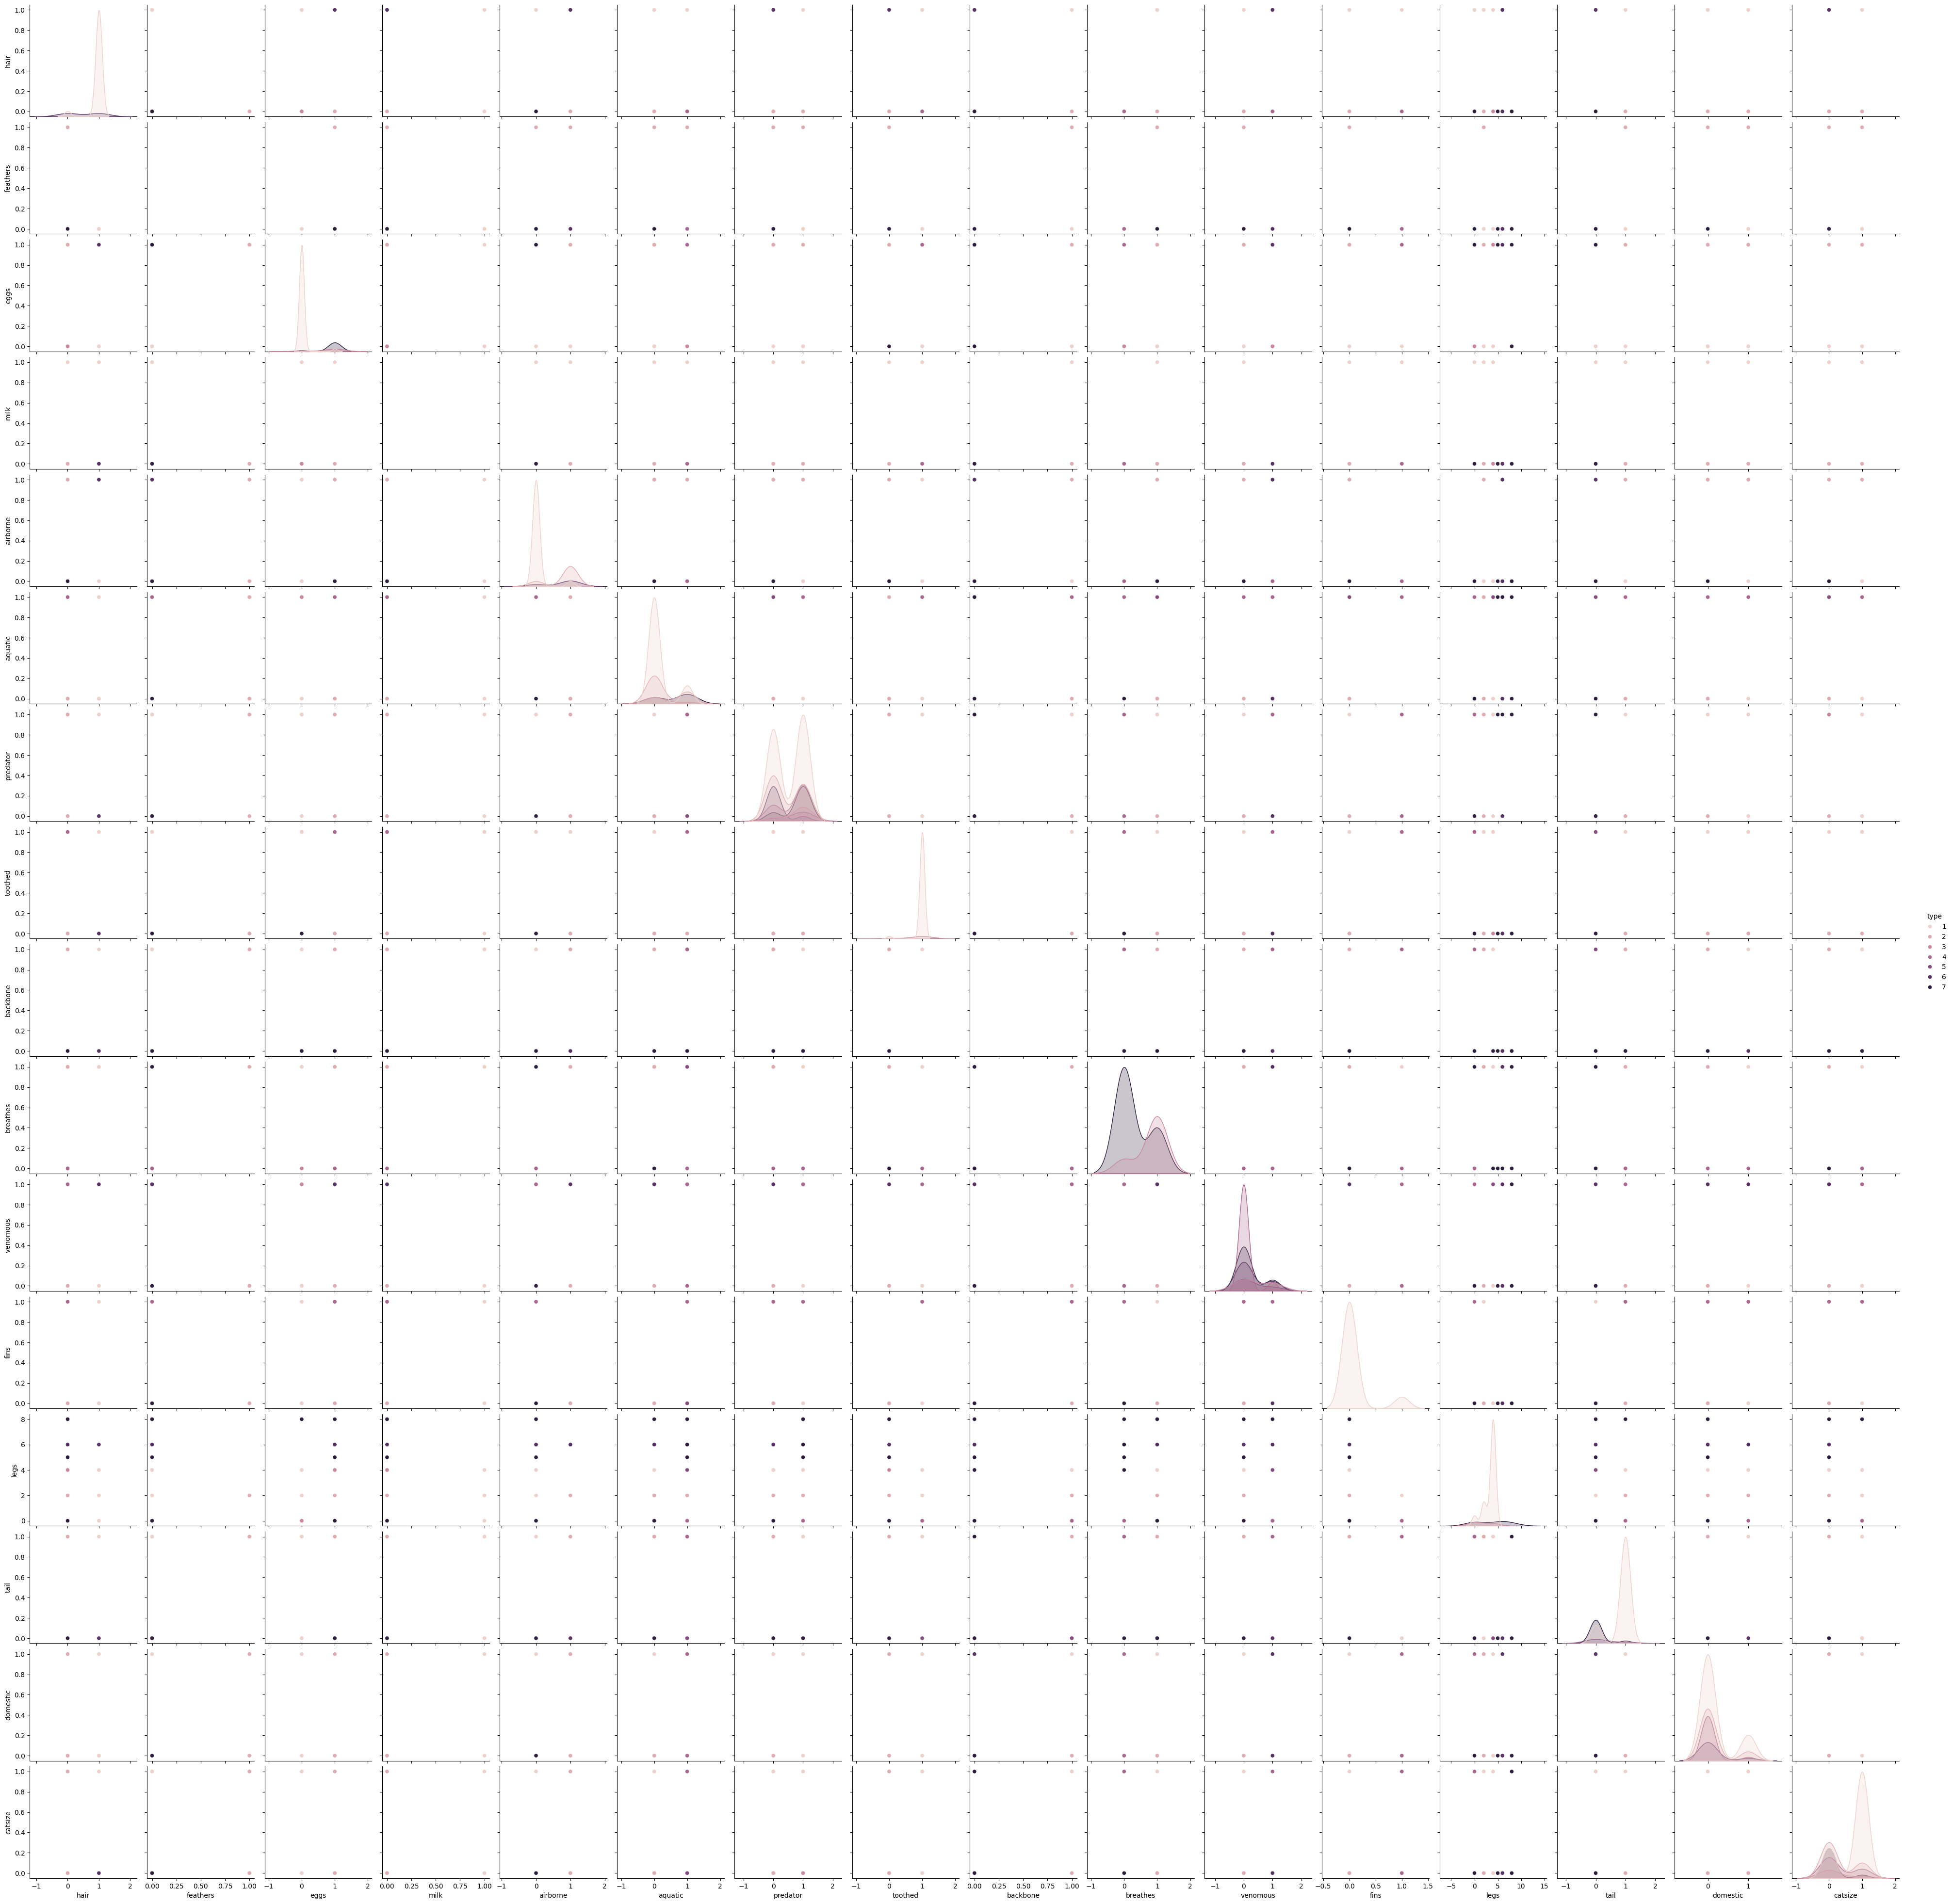

In [9]:
sns.pairplot(df, hue="type")
plt.show()

# **Correlation Heatmap**

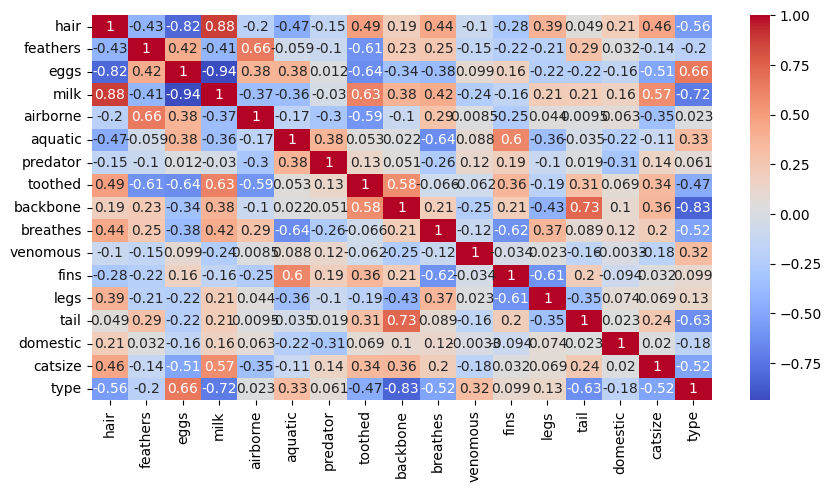

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.drop('animal name', axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

# **Count Plot**

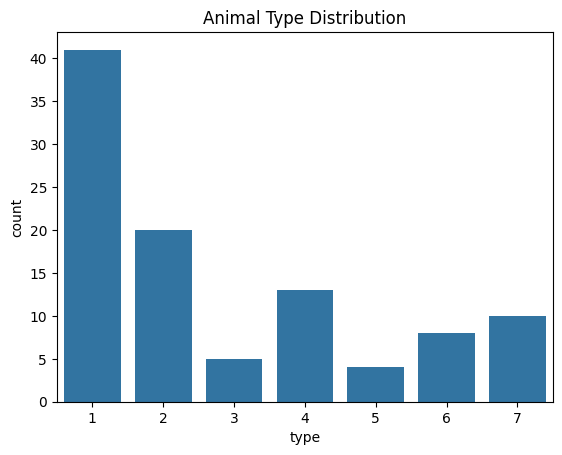

In [13]:
sns.countplot(x=df["type"])
plt.title("Animal Type Distribution")
plt.show()

# **3. Data Preprocessing**

**Handling Missing Values**

In [14]:
df.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [18]:
df.fillna(df.mode().iloc[0], inplace=True)

# **Handling Outliers (IQR Method)**

In [21]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))


# **4. Splitting Data into Train & Test**

**Separate features and label:**

In [28]:
X = df.drop(["type", "animal name"], axis=1)
y = df["type"]

**Train–test split:**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# **5. Feature Scaling (Important for KNN)**

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **6. Choosing the Best K Value**

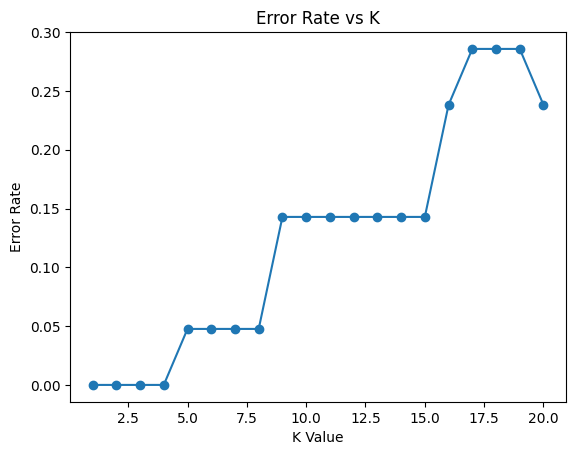

In [32]:
error = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    error.append(np.mean(pred_k != y_test))

plt.plot(range(1, 21), error, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Error Rate vs K")
plt.show()


# **7. Train Final KNN Model**

In [33]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

# **8. Model Evaluation**

In [34]:
y_pred = knn.predict(X_test_scaled)


**Accuracy**

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9523809523809523


**Classification Report**

In [36]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         8
         2.0       1.00      1.00      1.00         4
         3.0       0.00      0.00      0.00         1
         4.0       0.75      1.00      0.86         3
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Confusion Matrix**

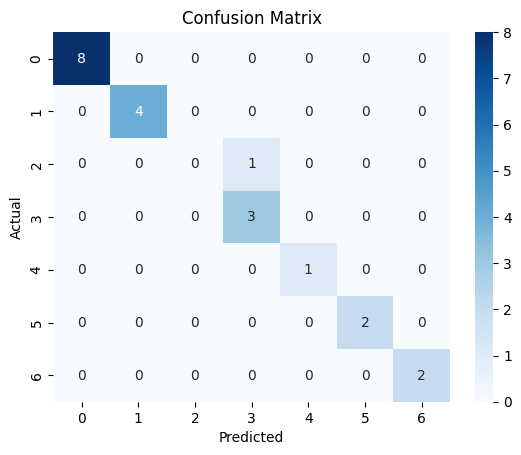

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


# **9. Decision Boundary Visualization**

**If dataset has more than 2 features → use PCA**

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)


KNeighborsClassifier()

**Plot the Decision Boundary**

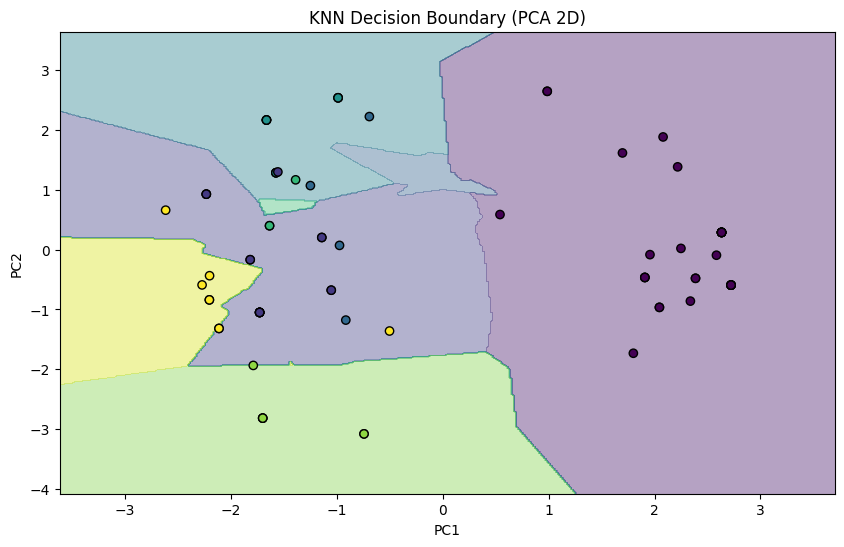

In [39]:
h = 0.02

x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, edgecolors='k')
plt.title("KNN Decision Boundary (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


# **1. What are the key hyperparameters in KNN?**

**① K (Number of Neighbors)**



*  The most important hyperparameter.

*   Controls how many nearest data points vote for the class (in classification) or average the value (in regression).

*   Small K → highly flexible but noisy (overfitting).


*  Large K → smooth decision boundary but may underfit.


**② Distance Metric (metric)**


*   Determines how “closeness” between points is calculated.
*  Common metrics: Euclidean, Manhattan, Minkowski.

**③ Weights (weights)**



*   uniform → all neighbors have equal weight.
*  distance → closer neighbors have higher influence.

*   Helps improve performance when data density varie

**④ Algorithm (algorithm)**
Selects how nearest neighbors are searched:

*  auto
*   ball_tree

*   kd_tree
*   brute

**⑤ Leaf Size (leaf_size)**

*  Used when using KD-tree or Ball-tree.
*   Impacts speed of training and prediction (not accuracy).


**⑥ p (Power Parameter for Minkowski Distance)**

*   p = 1 → Manhattan distance

*   p = 2 → Euclidean distance
*  p > 2 → higher-order distances


**Summary: Key KNN Hyperparameters**


| Hyperparameter      | Purpose                                   |
| ------------------- | ----------------------------------------- |
| **K**               | Controls number of neighbors              |
| **Distance metric** | Defines how distance is computed          |
| **Weights**         | Equal-weight or distance-weight           |
| **Algorithm**       | Search method (kd-tree, ball-tree, brute) |
| **Leaf size**       | Tree optimization parameter               |
| **p**               | Power parameter for Minkowski             |


















# **2. What distance metrics can be used in KNN?**

KNN supports many distance metrics because it is a distance-based algorithm.

**① Euclidean Distance (Most common)**

**Formula:**

𝑑
=
∑
(
𝑥
𝑖
−
𝑥
𝑗
)
2
d=
∑(x
i
	​

−x
j
	​

)
2
	​


Best for continuous numerical features.


**② Manhattan Distance (L1 Distance)**

Formula:

𝑑
=
∑
∣
𝑥
𝑖
−
𝑥
𝑗
∣
d=∑∣x
i
	​

−x
j
	​

∣

Useful when features are on different scales or dataset has outliers.


**③ Minkowski Distance (Generalized form)**
𝑑
=
(
∑
∣
𝑥
𝑖
−
𝑥
𝑗
∣
𝑝
)
1
/
𝑝
d=(∑∣x
i
	​

−x
j
	​

∣
p
)
1/p

p = 1 → Manhattan

p = 2 → Euclidean

p = 3, 4 → higher order distances

**④ Chebyshev Distance**
𝑑
=
max
⁡
(
∣
𝑥
𝑖
−
𝑥
𝑗
∣
)
d=max(∣x
i
	​

−x
j
	​

∣)

Used when the maximum difference is more important than cumulative differences.

**⑤ Cosine Distance**

Used for text, recommender systems, or high-dimensional sparse data.

𝑑
=
1
−
𝐴
⋅
𝐵
∣
∣
𝐴
∣
∣
∣
∣
𝐵
∣
∣
d=1−
∣∣A∣∣∣∣B∣∣
A⋅B
	​

**⑥ Hamming Distance**

Used for categorical/binary features.

**⑦ Mahalanobis Distance**

Accounts for correlation between features.

**Summary: Distance Metrics in KNN**

| Distance Metric | Used For                       |
| --------------- | ------------------------------ |
| **Euclidean**   | General numeric data           |
| **Manhattan**   | Sparse or outlier-heavy data   |
| **Minkowski**   | Generalized form (p=1 or 2)    |
| **Chebyshev**   | Max difference dominance       |
| **Cosine**      | Text, high-dimensional vectors |
| **Hamming**     | Categorical variables          |
| **Mahalanobis** | Correlated features            |
